In [6]:
from sklearn.datasets import fetch_mldata
import os

path = os.getcwd()

#https://www.openml.org/d/554
mnist = fetch_openml('mnist_784')
#C:\Users\Stephen\scikit_learn_data
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [8]:
import joblib
joblib.dump(mnist, 'mnist.pkl')

['mnist.pkl']

In [2]:
import joblib
mnist = joblib.load('mnist.pkl')

In [3]:
#explore the mnist dataset
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [32]:
#display the 35000th digit
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
'''
digit = X[35000]
digit_image = digit.reshape(28, 28)
print('Target:', y[35000])
plt.imshow(digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()
'''

"\ndigit = X[35000]\ndigit_image = digit.reshape(28, 28)\nprint('Target:', y[35000])\nplt.imshow(digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')\nplt.axis('off')\nplt.show()\n"

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
#shuffling training set to ensure good cross-validation folds
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [6]:
y_train[:10]

array(['3', '7', '5', '7', '8', '3', '3', '4', '9', '0'], dtype=object)

In [24]:
#setting up target vectors for a binary classifier
y_train_5 = (y_train == '5') #True for all 5's, False for other digits
y_test_5 = (y_test == '5')

In [27]:
a_five = y_train_5[0]
print(a_five)

True


In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
#sgd_clf.fit(X_train, y_train_5)

In [8]:
a_five = y[0]
print(a_five)
not_a_five = y[1]
print(not_a_five)

5
0


In [10]:
five, not_five = X[0], X[1]
#sgd_clf.predict([five, not_five])

In [43]:
#measuring performance on the training set
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9623
0.92065
0.9307


In [22]:
from sklearn.model_selection import cross_val_score

#cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

In [45]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [46]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.90935, 0.9104 , 0.9092 ])

In [27]:
#setting up predictions for the confusion matrix
from sklearn.model_selection import cross_val_predict

#y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [29]:
from sklearn.metrics import confusion_matrix

#confusion_matrix(y_train_5, y_train_pred)

In [50]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [53]:
#precision vs recall
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.6125132837407014
0.8505810736026563


In [50]:
from sklearn.metrics import f1_score

#f1_score(y_train_5, y_train_pred)

In [56]:
y_scores = sgd_clf.decision_function([five, not_five])
y_scores

array([  2405.7447529 , -11051.08912688])

In [58]:
threshold = 0
y_five_predict = (y_scores > threshold)
y_five_predict

array([ True, False])

In [59]:
threshold = 10000
y_five_predict = (y_scores > threshold)
y_five_predict

array([False, False])

In [61]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [62]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [64]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0, 1])

<function matplotlib.pyplot.show(*args, **kw)>

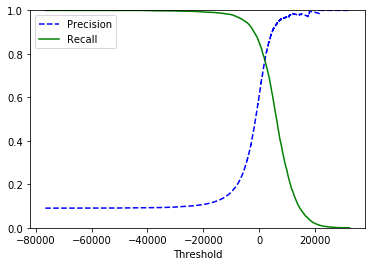

In [65]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show

(0, 1)

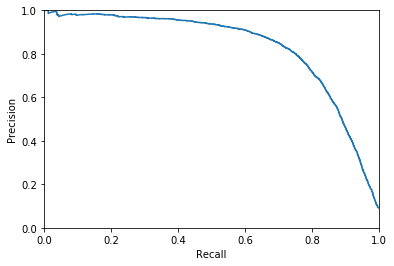

In [66]:
plt.plot(recalls[:-1], precisions[:-1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0, 1])
plt.ylim([0, 1])

In [80]:
y_train_pred_90 = (y_scores > 4500)

In [81]:
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.8964599414426404
0.6212875853163623


In [82]:
#ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [83]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

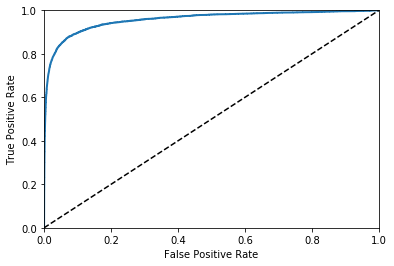

In [84]:
plot_roc_curve(fpr, tpr)
plt.show()

In [85]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9572190963345835

In [20]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
#y_probas_forst = cross_val_predict(forest_clf, X_train, y_train_5,
 #                                  cv=3, method='predict_proba')

In [91]:
y_scores_forest = y_probas_forst[:, 1] #score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,
                                                     y_scores_forest)

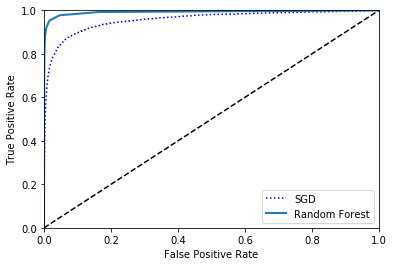

In [94]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='best')
plt.show()

In [95]:
roc_auc_score(y_train_5, y_scores_forest)

0.992329359729937

In [96]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
print(precision_score(y_train_5, y_train_pred_forest))
print(recall_score(y_train_5, y_train_pred_forest))

C:\Users\Stephen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Stephen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Stephen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9842537147926369
0.8186681424091496


**Multiclass Classification**

In [11]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([five, not_five])

array(['5', '0'], dtype='<U1')

In [13]:
five_digit_scores = sgd_clf.decision_function([five])
not_five_digit_scores = sgd_clf.decision_function([not_five])
print('5 Scores:', five_digit_scores)
print('Not 5 Scores:', not_five_digit_scores)

5 Scores: [[-25162.24544667 -29624.6829046  -13346.23649903   1324.31653896
  -30953.39736856   2329.36561768 -25982.90390024 -11819.61258204
  -12171.99866025  -7488.35241286]]
Not 5 Scores: [[ 28636.55765003 -39579.78401366 -11120.86951895 -11005.63569199
  -29753.54272364  -9725.16594963 -14165.12269265 -18158.94985189
   -8670.23453396  -3939.22278545]]


In [16]:
argmax_index_5 = np.argmax(five_digit_scores)
argmax_index_not_5 = np.argmax(not_five_digit_scores)
print('Classes:', sgd_clf.classes_)
print('5:', sgd_clf.classes_[argmax_index_5])
print('Not 5:', sgd_clf.classes_[argmax_index_not_5])

Classes: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
5: 5
Not 5: 0


In [18]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
print('Predictions:', ovo_clf.predict([five, not_five]))
print('Number of classifiers:', len(ovo_clf.estimators_))

Predictions: ['5' '0']
Number of classifiers: 45


In [21]:
forest_clf.fit(X_train, y_train)
print('Predictions:', forest_clf.predict([five, not_five]))
print('Probabilities per Class:', forest_clf.predict_proba([five, not_five]))

C:\Users\Stephen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Predictions: ['5' '0']
Probabilities per Class: [[0.  0.  0.  0.2 0.  0.8 0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


In [23]:
print('SGD:', cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy'))
print('Random Forest:', cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='accuracy'))

SGD: [0.87872426 0.8640432  0.88253238]
Random Forest: [0.94236153 0.939997   0.93989098]


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
print('Scaled training data')
print('SGD:', cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy'))
print('Random Forest:', cross_val_score(forest_clf, X_train_scaled, y_train, cv=3, scoring='accuracy'))

Scaled training data


C:\Users\Stephen\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Stephen\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGD: [0.9070186  0.90544527 0.89813472]
Random Forest: [0.94231154 0.94014701 0.93969095]


In [26]:
sgd = (0.87872426 + 0.8640432 + 0.88253238) / 3
forest = (0.94236153 + 0.939997 + 0.93989098) / 3
sgd_scaled = (0.9070186 + 0.90544527 + 0.89813472) / 3
forest_scaled = (0.94231154 + 0.94014701 + 0.93969095) / 3
print(sgd, sgd_scaled)
print(forest, forest_scaled)

0.8750999466666668 0.9035328633333334
0.9407498366666666 0.9407165000000001


In [28]:
y_train_sgd_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
y_train_forest_pred = cross_val_predict(forest_clf, X_train_scaled, y_train, cv=3)

C:\Users\Stephen\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Stephen\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


NameError: name 'confusion_matrix' is not defined

In [30]:
sgd_conf_mx = confusion_matrix(y_train, y_train_sgd_pred)
forest_conf_mx = confusion_matrix(y_train, y_train_forest_pred)
print(sgd_conf_mx)
print(forest_conf_mx)

[[5602    0   14    9    9   44   31    8  204    2]
 [   0 6421   43   23    3   42    4   12  181   13]
 [  26   27 5268   90   68   21   66   39  339   14]
 [  28   18  113 5280    0  214   22   42  347   67]
 [  14   15   42   12 5224   12   37   20  293  173]
 [  28   15   27  166   50 4523   80   17  440   75]
 [  26   17   47    2   37   85 5570    6  128    0]
 [  19   14   50   26   45   14    4 5728  145  220]
 [  19   61   42   94    2  124   28    9 5429   43]
 [  23   18   29   60  125   37    1  183  306 5167]]
[[5823    0   12    9    6   10   28    1   32    2]
 [   2 6625   37   16   15   14   12    6    8    7]
 [  46   26 5638   58   43   14   26   37   61    9]
 [  27   19  155 5613    6  123    9   59   78   42]
 [  20   16   29    5 5536    8   35   18   22  153]
 [  47   20   25  172   25 4970   56   14   60   32]
 [  51   17   29    5   35   58 5692    3   28    0]
 [  10   35   82   30   76    5    2 5918   17   90]
 [  33   56   85  138   67  101   42   21 523

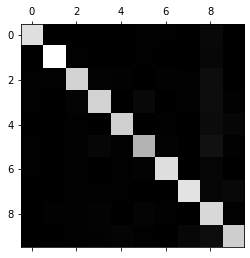

In [33]:
plt.matshow(sgd_conf_mx, cmap=plt.cm.gray)
plt.show()

In [34]:
sgd_row_sums = sgd_conf_mx.sum(axis=1, keepdims=True)
norm_sgd_conf_mx = sgd_conf_mx / sgd_row_sums

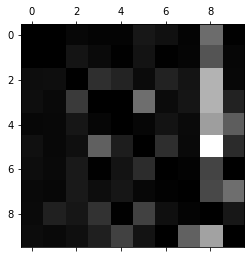

In [35]:
np.fill_diagonal(norm_sgd_conf_mx, 0)
plt.matshow(norm_sgd_conf_mx, cmap=plt.cm.gray)
plt.show()

In [36]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_sgd_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_sgd_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_sgd_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_sgd_pred == cl_b)]

In [42]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

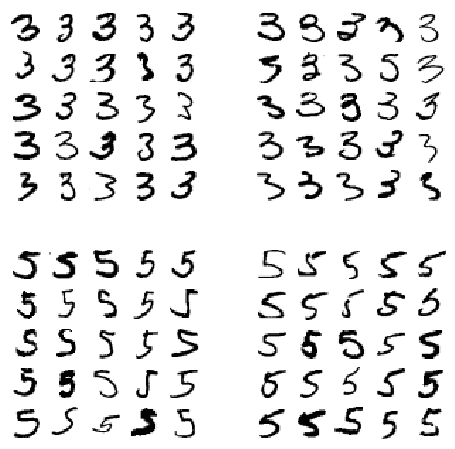

In [44]:
plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(X_aa[25:50], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[25:50], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[25:50], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[25:50], images_per_row=5)
plt.show()

In [48]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd_ints = np.asarray(y_train, dtype=int)
y_train_odd = (y_train_odd_ints % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [49]:
knn_clf.predict([five, not_five])

array([[False,  True],
       [False, False]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
print(f1_score(y_train, y_train_knn_pred, average='macro')) #20h35

In [ ]:
#multioutput classification
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")